In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Data_Mining/essay.tsv'

essays = pd.read_csv(file_path, delimiter='\t', encoding='latin1')

print(essays.head())

   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   
2               4               3             NaN              7   
3               5               5             NaN             10   
4               4               4             NaN              8   

   rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
0             NaN             NaN            NaN  ...   

In [ ]:
relevant_columns = ['essay_id', 'essay', 'domain1_score']

essays = essays[relevant_columns]
essays.head()

,essay_id,essay,domain1_score
0,1,"Dear local newspaper, I think effects computer...",8
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,"Dear @LOCATION1, I know having computers has a...",8


In [ ]:
save_path = '/content/drive/MyDrive/Data_Mining/filtered_essay_data.csv'
essays.to_csv(save_path, index=False)
filtered_essays = pd.read_csv(save_path)
print(filtered_essays.head())

   essay_id                                              essay  domain1_score
0         1  Dear local newspaper, I think effects computer...              8
1         2  Dear @CAPS1 @CAPS2, I believe that using compu...              9
2         3  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...              7
3         4  Dear Local Newspaper, @CAPS1 I have found that...             10
4         5  Dear @LOCATION1, I know having computers has a...              8


In [ ]:
filtered_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   essay_id       12976 non-null  int64 
 1   essay          12976 non-null  object
 2   domain1_score  12976 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 304.2+ KB


In [ ]:
essays=filtered_essays

In [ ]:
print("Dataset Info:")
print(essays.info())
print("\nMissing Value Counts:")
print(essays.isnull().sum())

duplicate_count = essays.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

print("\nBasic Statistics for Numerical Columns:")
print(essays.describe())

unique_essay_count = essays['essay_id'].nunique()
total_essay_count = len(essays)
print(f"\nTotal Unique Essay IDs: {unique_essay_count} out of {total_essay_count} total rows")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   essay_id       12976 non-null  int64 
 1   essay          12976 non-null  object
 2   domain1_score  12976 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 304.2+ KB
None

Missing Value Counts:
essay_id         0
essay            0
domain1_score    0
dtype: int64

Number of Duplicate Rows: 0

Basic Statistics for Numerical Columns:
           essay_id  domain1_score
count  12976.000000   12976.000000
mean   10295.395808       6.800247
std     6309.074105       8.970705
min        1.000000       0.000000
25%     4438.750000       2.000000
50%    10044.500000       3.000000
75%    15681.250000       8.000000
max    21633.000000      60.000000

Total Unique Essay IDs: 12976 out of 12976 total rows


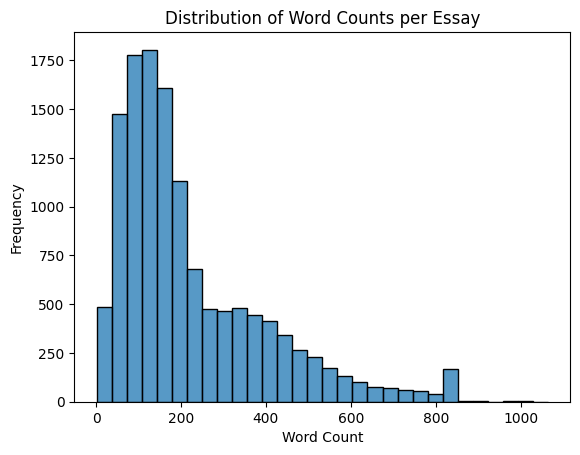

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

essays.rename(columns={'domain1_score': 'score'}, inplace=True)

essays['word_count'] = essays['essay'].apply(lambda x: len(x.split()))
sns.histplot(essays['word_count'], bins=30)
plt.title("Distribution of Word Counts per Essay")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


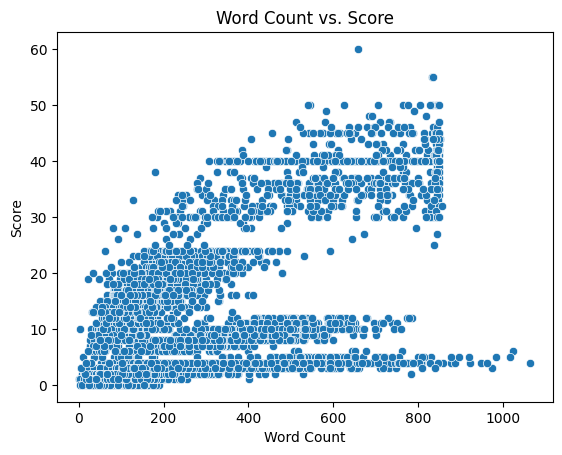

In [ ]:
sns.scatterplot(x='word_count', y='score', data=essays)
plt.title("Word Count vs. Score")
plt.xlabel("Word Count")
plt.ylabel("Score")
plt.show()



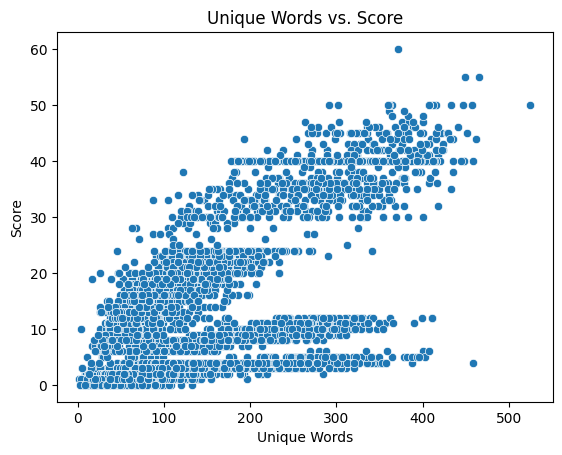

In [ ]:
essays['unique_words'] = essays['essay'].apply(lambda x: len(set(x.split())))
sns.scatterplot(x='unique_words', y='score', data=essays)
plt.title("Unique Words vs. Score")
plt.xlabel("Unique Words")
plt.ylabel("Score")
plt.show()

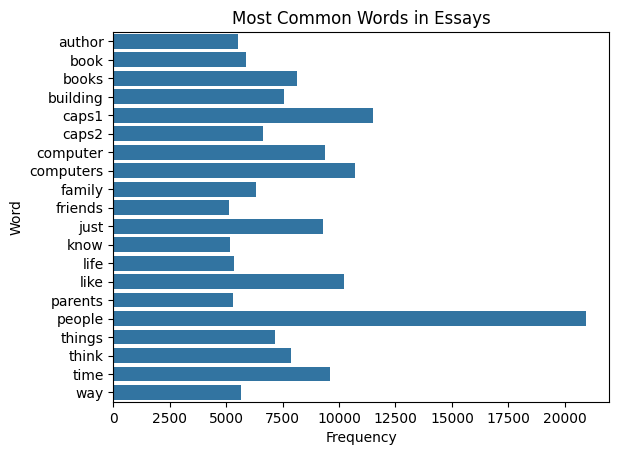

In [ ]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(essays['essay'])
common_words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)

sns.barplot(x=word_counts, y=common_words)
plt.title("Most Common Words in Essays")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()



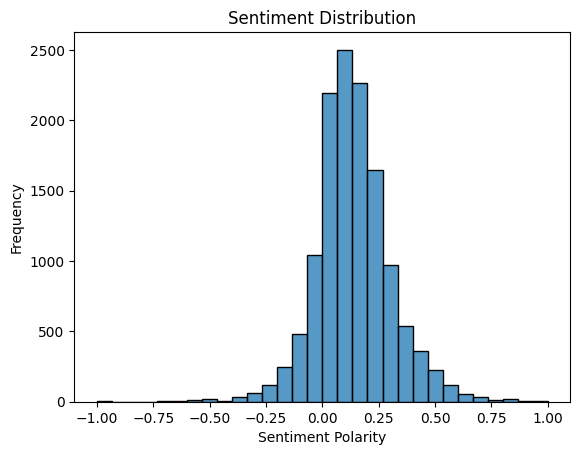

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

essays['sentiment'] = essays['essay'].apply(get_sentiment)
sns.histplot(essays['sentiment'], bins=30)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


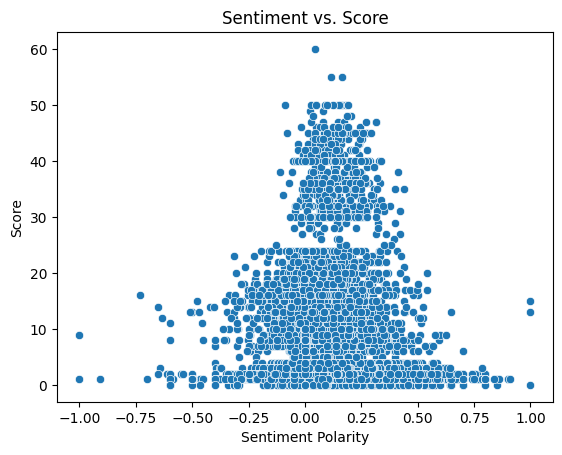

In [ ]:
sns.scatterplot(x='sentiment', y='score', data=essays)
plt.title("Sentiment vs. Score")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Score")
plt.show()

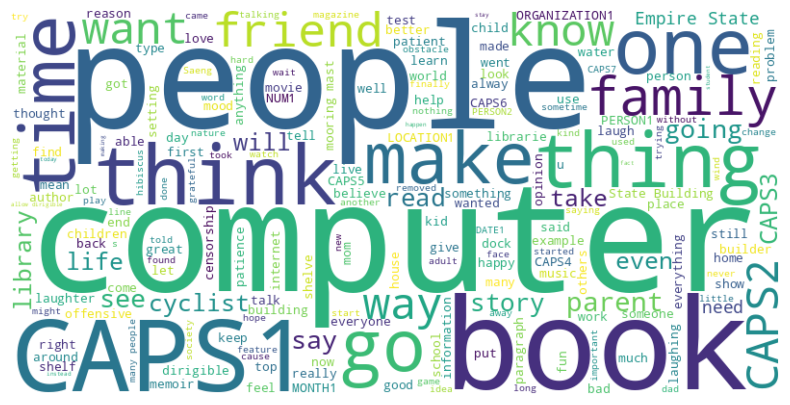

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(essays['essay']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(essays['essay'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model.fit(data_vectorized)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words=10)


Topic 0:
books people book offensive like think read library things just
Topic 1:
building dirigibles cyclist state empire mast water builders mooring setting
Topic 2:
caps1 time got just caps2 patient said like person1 caps3
Topic 3:
people computers computer time friends use caps1 family help think
Topic 4:
mood parents author family memoir home narciso love life happy


In [ ]:
pip install textatistic


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29049 sha256=6868750d1629f97120a2b3d6399cd9e70ef0ea7129781bbed15b5d193c171e1b
  Stored in directory: /root/.cache/pip/wheels/6e/31/c3/df8af4aa9ec3f671b0e8bc3bfa642c75918f2479ca4050f5f4
  Created wheel for pyhyphen: filename=PyHyphen-4.0.3-cp37-abi3-linux_x86_64.whl size=64703 sha256=900c9fbe0d8d5ba13fdbefe689d9c5c79a6a8584b6be5d712df19240eed1fc4a
  Stored in directory: /root/.cache/pip/wheels/5e/8e/2c/099292ddfe67d4168785f44109ee79131c652ee5bdd66502b8
Successfully built textatistic pyhyphen


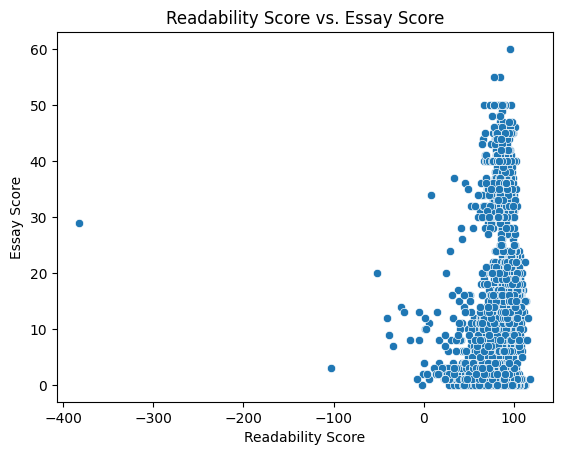

In [ ]:
from textatistic import Textatistic

def calculate_readability(texts):
    readability_scores = []
    for text in texts:
        try:
            readability = Textatistic(text)
            scores = readability.scores
            readability_scores.append(scores['flesch_score'])
        except:
            readability_scores.append(None)
    return readability_scores

essays['readability_score'] = calculate_readability(essays['essay'])

sns.scatterplot(x='readability_score', y='score', data=essays)
plt.title("Readability Score vs. Essay Score")
plt.xlabel("Readability Score")
plt.ylabel("Essay Score")
plt.show()
